In [9]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from scipy.integrate import odeint

# pip install ipympl
# %matplotlib notebook
%matplotlib ipympl 

In [10]:
def single_pendulum_wof(y, t, m, l, g, kf):
    x1, x2 = y

    dxdt = [x2,
            -g/l*np.sin(x1) - kf/m*x2]

    return dxdt

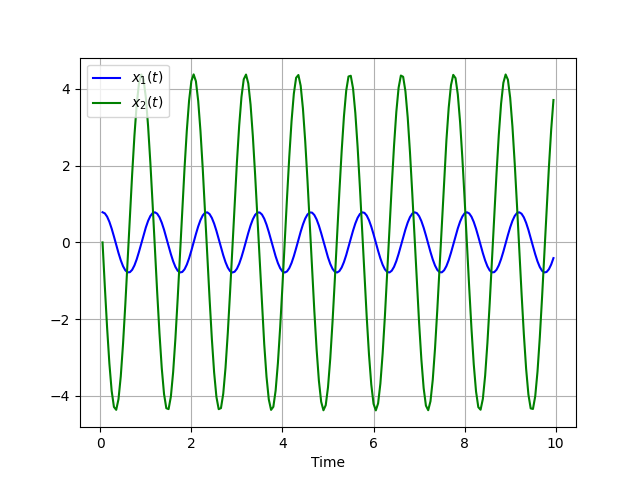

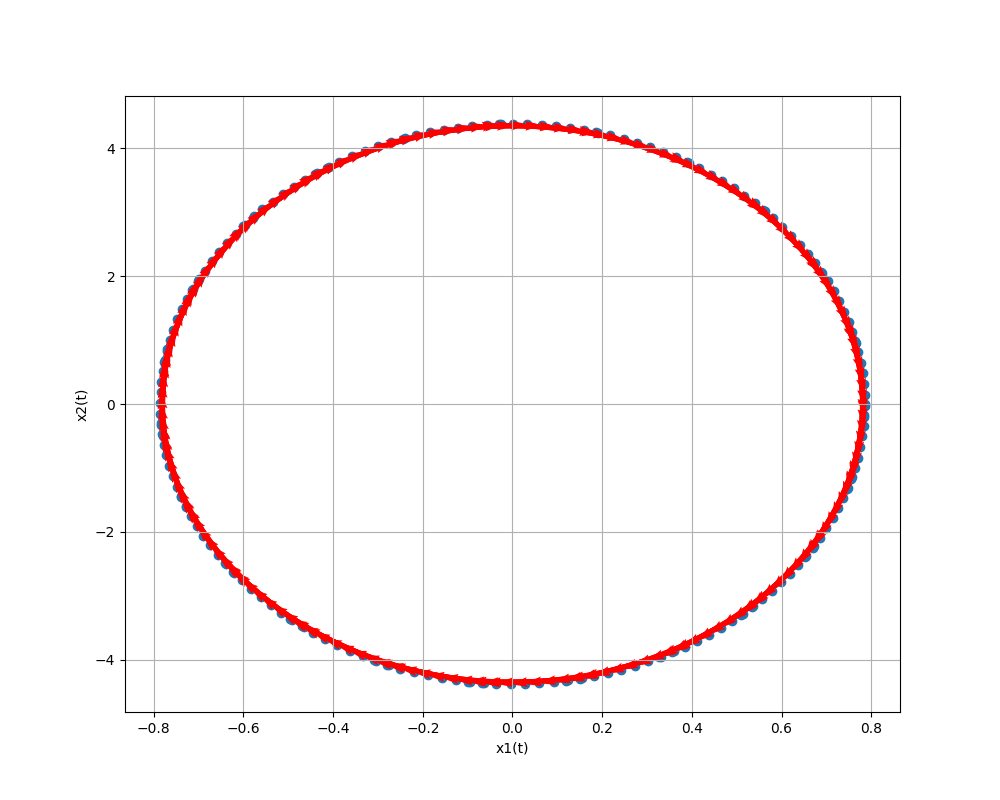

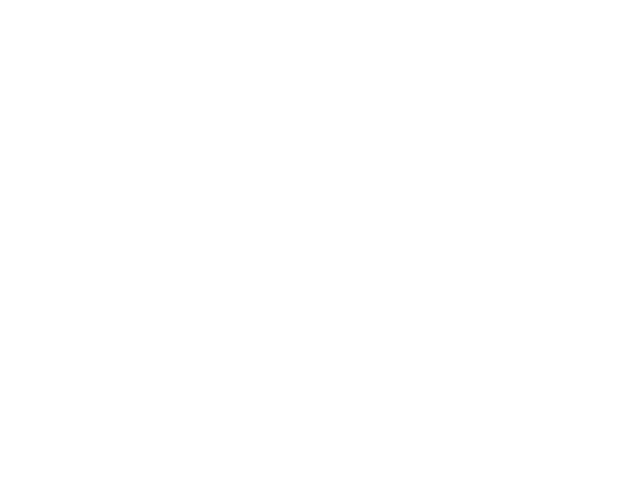

In [11]:
# Parameters of the system
m = 0.5 # mass of the ball [Kg]
g = 9.81 # gravity [m/s²]
l = 0.30 # long [m]
kf = 0 # friction coefficient

# Initial conditions
y0 = [np.pi/4, 0.0]

# Parameters of simulation
h = 5e-2
tfin = 10
N = np.int64(np.ceil((tfin-h)/h))
t = h + np.arange(0,N)*h

sol = odeint(single_pendulum_wof, y0, t, args=(m, l, g, kf))

plt.figure()
plt.plot(t, sol[:, 0], 'b', label = r'$x_1(t)$')
plt.plot(t, sol[:, 1], 'g', label = r'$x_2(t)$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.grid()
plt.show()

plt.figure()
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(sol[:, 0], sol[:, 1])
q = ax.quiver(sol[:-1, 0], sol[:-1, 1], sol[1:, 0] - sol[:-1, 0], sol[1:, 1] - sol[:-1, 1], scale_units = 'xy', angles = 'xy', scale = 1, color = 'red')
ax.quiverkey(q, X = np.max(sol[:, 0]), Y = np.max(sol[:, 1]), U=1, label='Quiver key, length = 10', labelpos='E', color = 'black')
plt.xlabel('x1(t)')
plt.ylabel('x2(t)')
plt.grid()
plt.show()

In [12]:
x1 = np.linspace(-np.max(sol[:, 0]), np.max(sol[:, 0]), 50)
x2 = np.linspace(-np.max(sol[:, 1]), np.max(sol[:, 1]), 50)

X1, X2 = np.meshgrid(x1, x2)

V = lambda x1, x2: (g/l)*(1 - np.cos(x1)) + (1/2)*x2**2
u = (g/l)*np.sin(X1)
v = X2

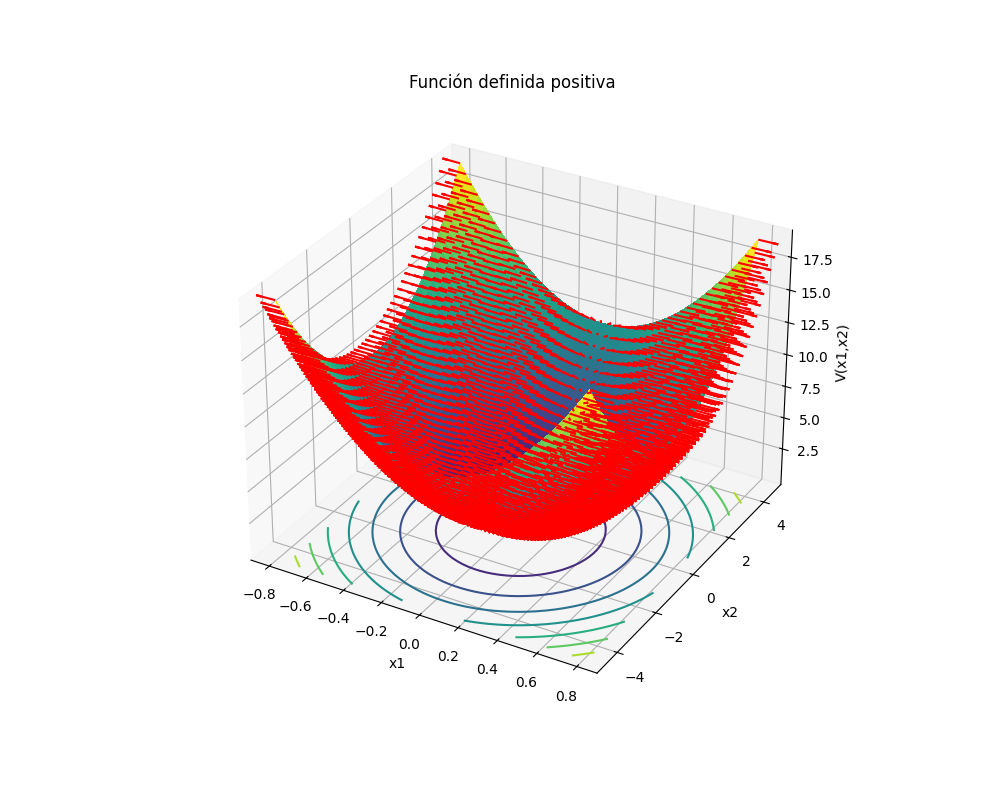

In [13]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,8))
surf = ax.plot_surface(X1, X2, V(X1,X2), cmap = 'viridis', linewidth=0, antialiased=False)
ax.quiver(X1, X2, V(X1, X2), u, v, 0, length=0.1, normalize=True, color = 'red')
ax.contour(X1, X2, V(X1,X2), cmap = 'viridis', offset = -1)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('V(x1,x2)')
plt.title('Función definida positiva')
plt.show()

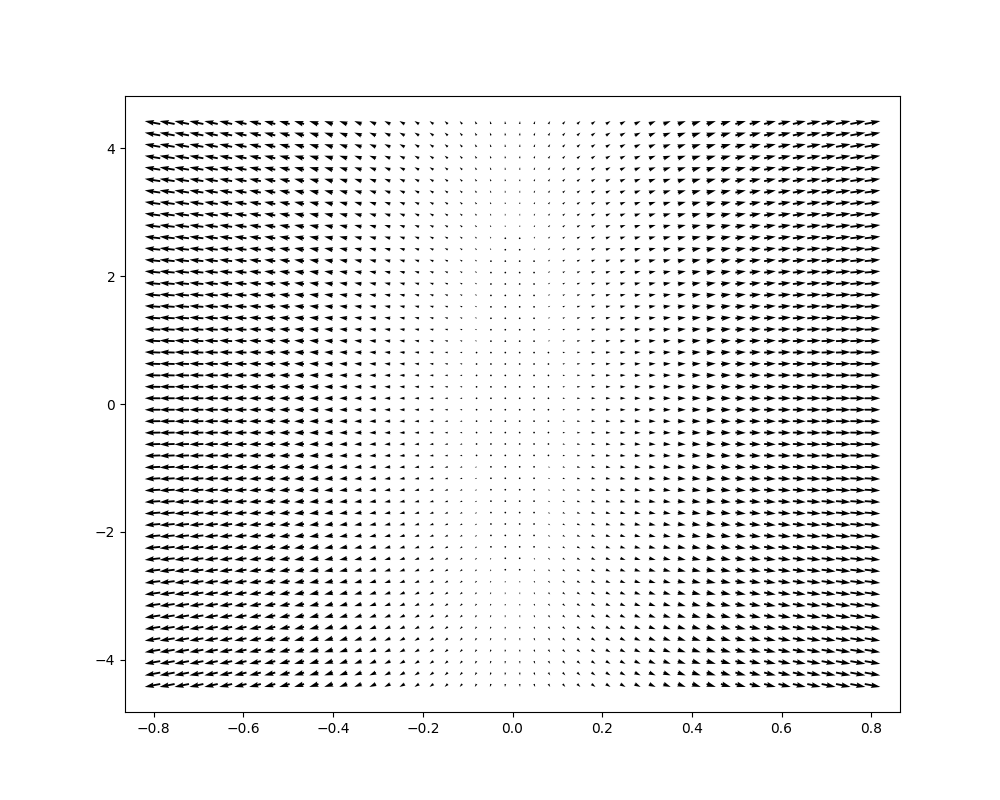

In [14]:
fig, ax = plt.subplots(figsize=(10,8))
q = ax.quiver(X1, X2, u, v)
ax.quiverkey(q, X = np.max(X1), Y = np.max(X2), U=1,
             label='Quiver key, length = 10', labelpos='E')

plt.show()

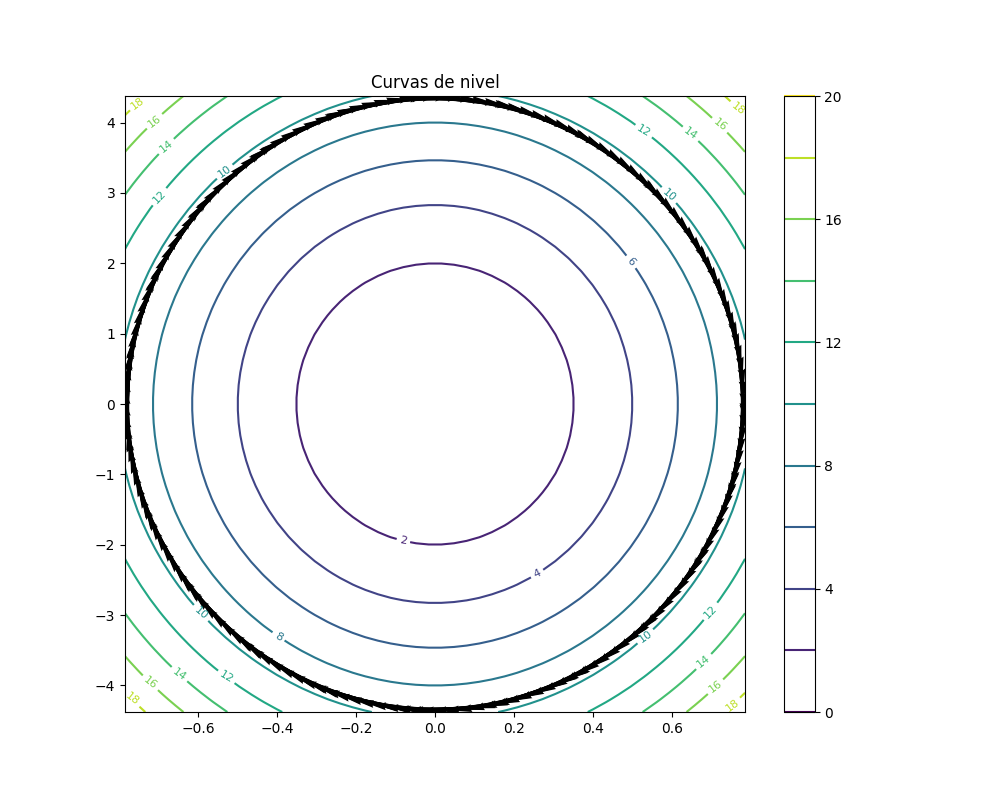

In [15]:
plt.figure(figsize=(10,8))
contours = plt.contour(X1, X2, V(X1,X2), 10)
plt.clabel(contours, inline=True, fontsize=8)
plt.colorbar()
q = plt.quiver(sol[:-1, 0], sol[:-1, 1], sol[1:, 0] - sol[:-1, 0], sol[1:, 1] - sol[:-1, 1], scale_units = 'xy', angles = 'xy', scale = 1)
plt.quiverkey(q, X = np.max(sol[:, 0]), Y = np.max(sol[:, 1]), U=1,
             label='Quiver key, length = 10', labelpos='E')
plt.title('Curvas de nivel')
plt.show()

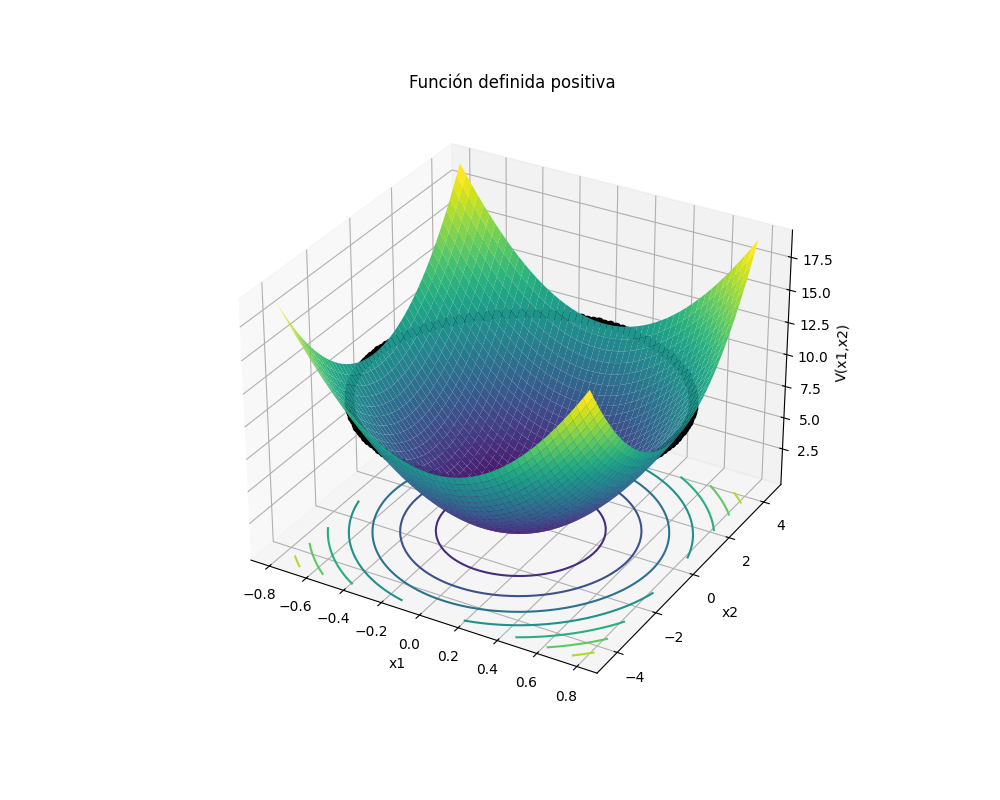

In [16]:
Vp = lambda x1, x2: -(kf/m)*x2**2

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,8))
surf = ax.plot_surface(X1, X2, V(X1,X2), cmap = 'viridis', linewidth=0, antialiased=True)
ax.contour(X1, X2, V(X1,X2), cmap = 'viridis', offset = -1)
ax.plot3D(sol[:, 0], sol[:, 1], V(sol[:, 0], sol[:, 1]), 'o--k')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('V(x1,x2)')
plt.title('Función definida positiva')
plt.show()
